In [ ]:
%cd ..

In [2]:
import sys

sys.path.append('src')

In [3]:
import json
from pathlib import Path
from collections import Counter
from importlib import reload

import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

import data
import utils

In [4]:
data_dir = Path('data')

In [5]:
%ls -lh {data_dir}

total 22G
-rw-rw-r-- 1 andy andy  28M окт 17 17:54 test.jsonl
-rw-rw-r-- 1 andy andy 2,8M ноя  1 21:58 test.npz
-rw-rw-r-- 1 andy andy 5,4M окт 26 22:17 test.txt
-rw-rw-r-- 1 andy andy  17G окт 17 17:54 train.jsonl
-rw-rw-r-- 1 andy andy 1,7G ноя  1 22:08 train.npz
-rw-rw-r-- 1 andy andy  61M окт 26 21:29 train.ref
-rw-rw-r-- 1 andy andy 3,2G окт 26 22:26 train.txt
-rw-rw-r-- 1 andy andy 1,5M окт 26 21:24 valid_500.jsonl
-rw-rw-r-- 1 andy andy 150K ноя  1 21:57 valid_500.npz
-rw-rw-r-- 1 andy andy 5,2K окт 26 21:24 valid_500.ref
-rw-rw-r-- 1 andy andy 290K окт 26 22:18 valid_500.txt
-rw-rw-r-- 1 andy andy  28M окт 17 17:54 valid.jsonl
-rw-rw-r-- 1 andy andy 2,8M ноя  1 21:57 valid.npz
-rw-rw-r-- 1 andy andy 104K окт 17 17:54 valid.ref
-rw-rw-r-- 1 andy andy 5,5M окт 26 22:17 valid.txt
-rw-rw-r-- 1 andy andy 9,5M окт 17 17:53 voc.txt


In [6]:
train_path = data_dir / 'train.jsonl'
val_path = data_dir / 'valid.jsonl'
test_path = data_dir / 'test.jsonl'
dict_path = data_dir / 'voc.txt'

train_line_path = data_dir / 'train.txt'
val_line_path = data_dir / 'valid.txt'
test_line_path = data_dir / 'test.txt'

train_words_path = data_dir / 'train.ref'
val_words_path = data_dir / 'valid.ref'

In [5]:
!wc -l {train_path}

6000000 data/train.jsonl


In [7]:
!wc -l {val_path}

10000 data/valid.jsonl


In [9]:
!wc -l {test_path}

10000 data/test.jsonl


In [6]:
with open(train_path) as f:
    train_dp = json.loads(f.readline())

with open(val_path) as f:
    val_dp = json.loads(f.readline())

with open(test_path) as f:
    test_dp = json.loads(f.readline())

In [61]:
train_dp.keys(), val_dp.keys(), test_dp.keys()

(dict_keys(['word', 'curve']), dict_keys(['curve']), dict_keys(['curve']))

In [7]:
train_words = []
train_grids = []
with open(train_path) as f:
    for i in tqdm(f):
        d = json.loads(i)
        train_words.append(d['word'])
        grid = d['curve']['grid']
        train_grids.append((grid['grid_name'], grid['height'], grid['width']))

0it [00:00, ?it/s]

In [62]:
val_grids = []
with open(val_path) as f:
    for i in tqdm(f):
        d = json.loads(i)
        grid = d['curve']['grid']
        val_grids.append((grid['grid_name'], grid['height'], grid['width']))

0it [00:00, ?it/s]

In [63]:
test_grids = []
with open(test_path) as f:
    for i in tqdm(f):
        d = json.loads(i)
        grid = d['curve']['grid']
        test_grids.append((grid['grid_name'], grid['height'], grid['width']))

0it [00:00, ?it/s]

In [8]:
train_word_counter = Counter(train_words)

In [9]:
train_word_counter.most_common(10)

[('не', 205313),
 ('ты', 114279),
 ('что', 101851),
 ('да', 98591),
 ('на', 97713),
 ('как', 79299),
 ('ну', 75709),
 ('это', 60136),
 ('все', 54085),
 ('нет', 48430)]

In [35]:
sum(c for _, c in train_word_counter.most_common(50000))

5820079

In [40]:
len(train_word_counter)

153067

In [41]:
train_word_counter.most_common(20)

[('не', 205313),
 ('ты', 114279),
 ('что', 101851),
 ('да', 98591),
 ('на', 97713),
 ('как', 79299),
 ('ну', 75709),
 ('это', 60136),
 ('все', 54085),
 ('нет', 48430),
 ('так', 47333),
 ('мне', 44526),
 ('меня', 44069),
 ('привет', 41236),
 ('хорошо', 39090),
 ('тебя', 38207),
 ('то', 34084),
 ('ок', 32531),
 ('еще', 30095),
 ('тебе', 29922)]

<BarContainer object of 1000 artists>

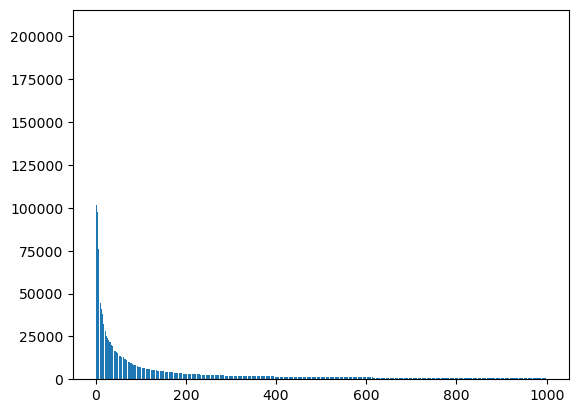

In [47]:
plot_n = 1000
plt.bar(np.arange(plot_n), [c for _, c in train_word_counter.most_common(plot_n)])

In [55]:
train_grid_counter = Counter(train_grids)
train_grid_counter

Counter({('default', 667, 1080): 5626340, ('extra', 667, 1080): 373660})

In [64]:
Counter(val_grids)

Counter({('default', 667, 1080): 9416, ('extra', 667, 1080): 584})

In [65]:
Counter(test_grids)

Counter({('extra', 667, 1080): 627, ('default', 667, 1080): 9373})

In [69]:
val_dp['curve']['grid'], test_dp['curve']['grid']

({'width': 1080,
  'height': 667,
  'keys': [{'label': 'й', 'hitbox': {'x': 0, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'ц', 'hitbox': {'x': 98, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'у', 'hitbox': {'x': 196, 'y': 15, 'w': 100, 'h': 154}},
   {'label': 'к', 'hitbox': {'x': 295, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'е', 'hitbox': {'x': 393, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'н', 'hitbox': {'x': 491, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'г', 'hitbox': {'x': 589, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'ш', 'hitbox': {'x': 687, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'щ', 'hitbox': {'x': 785, 'y': 15, 'w': 100, 'h': 154}},
   {'label': 'з', 'hitbox': {'x': 884, 'y': 15, 'w': 99, 'h': 154}},
   {'label': 'х', 'hitbox': {'x': 982, 'y': 15, 'w': 98, 'h': 154}},
   {'label': 'ф', 'hitbox': {'x': 0, 'y': 169, 'w': 99, 'h': 154}},
   {'label': 'ы', 'hitbox': {'x': 98, 'y': 169, 'w': 99, 'h': 154}},
   {'label': 'в', 'hitbox': {'x': 196, 'y': 169, 'w': 100, 'h':

In [75]:
grids = {}
with open(val_path) as f:
    for i in tqdm(f):
        d = json.loads(i)
        grid = d['curve']['grid']
        if grid['grid_name'] not in grids:
            grids[grid['grid_name']] = grid['keys']
        else:
            if grid['keys'] != grids[grid['grid_name']]:
                break

0it [00:00, ?it/s]

In [153]:
with open('grids.json', 'wt') as f:
    json.dump(grids, f)

In [91]:
{b['label'] for b in grids['extra'] if 'label' in b} - {b['label'] for b in grids['default'] if 'label' in b}

{'?', 'ъ', 'ё'}

In [93]:
[b for b in grids['extra'] if 'label' not in b]

[{'action': 'shift', 'hitbox': {'x': 0, 'y': 323, 'w': 91, 'h': 154}},
 {'action': 'backspace', 'hitbox': {'x': 990, 'y': 323, 'w': 90, 'h': 154}},
 {'action': 'toNumberState', 'hitbox': {'x': 0, 'y': 477, 'w': 141, 'h': 154}},
 {'action': 'globe', 'hitbox': {'x': 140, 'y': 477, 'w': 120, 'h': 154}},
 {'action': 'space', 'hitbox': {'x': 356, 'y': 477, 'w': 455, 'h': 154}},
 {'action': 'enter', 'hitbox': {'x': 907, 'y': 477, 'w': 173, 'h': 154}}]

In [94]:
[b for b in grids['default'] if 'label' not in b]

[{'action': 'shift', 'hitbox': {'x': 0, 'y': 323, 'w': 120, 'h': 154}},
 {'action': 'backspace', 'hitbox': {'x': 961, 'y': 323, 'w': 119, 'h': 154}},
 {'action': 'toNumberState', 'hitbox': {'x': 0, 'y': 477, 'w': 141, 'h': 154}},
 {'action': 'globe', 'hitbox': {'x': 140, 'y': 477, 'w': 120, 'h': 154}},
 {'action': 'space', 'hitbox': {'x': 356, 'y': 477, 'w': 455, 'h': 154}},
 {'action': 'enter', 'hitbox': {'x': 907, 'y': 477, 'w': 173, 'h': 154}}]

In [14]:
voc = dict_path.read_text().split()

In [15]:
with open('vocabulary.csv', 'wt') as f:
    for w in voc:
        f.write(f'{w},{train_word_counter[w]}\n')

In [113]:
np.mean([w.isalnum() for w in voc])

0.9893466614243901

In [118]:
sum(c for w, c in train_word_counter.items() if w.isalnum()) / 6000000

0.9966905

In [14]:
grids = utils.load_grids('grids.json')

In [59]:
actual_lens, proj_lens = [], []
for t, w in tqdm(zip(data.TracesReader(train_line_path), data.read_words(train_words_path)), total=6000000):
    actual_len = utils.trace_len(t.coordinates)
    proj_trace = grids[t.grid_name].make_curve(w)
    proj_len = utils.trace_len(proj_trace)
    actual_lens.append(actual_len)
    proj_lens.append(proj_len)

actual_lens, proj_lens = np.array(actual_lens), np.array(proj_lens)

  0%|          | 0/6000000 [00:00<?, ?it/s]

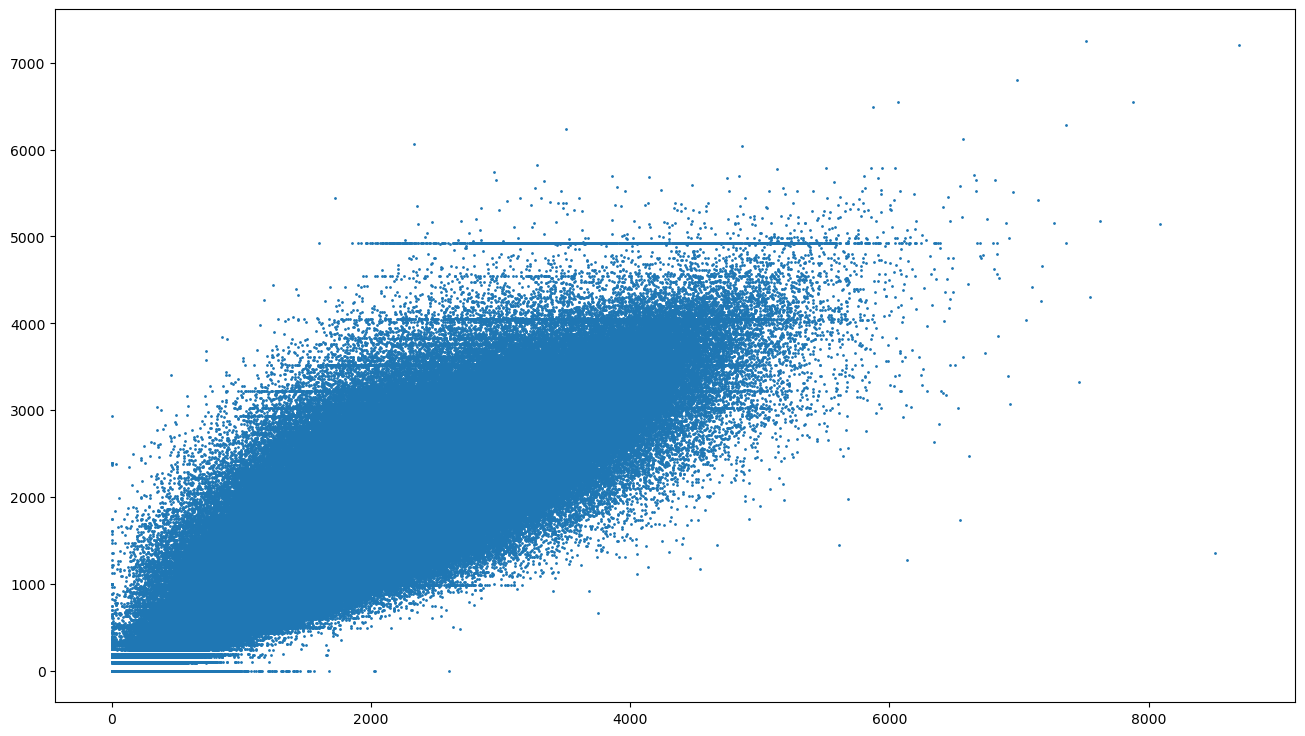

In [60]:
plt.figure(figsize=(16, 9))
plt.scatter(actual_lens, proj_lens, 1)

In [68]:
np.min(proj_len)

347.2629

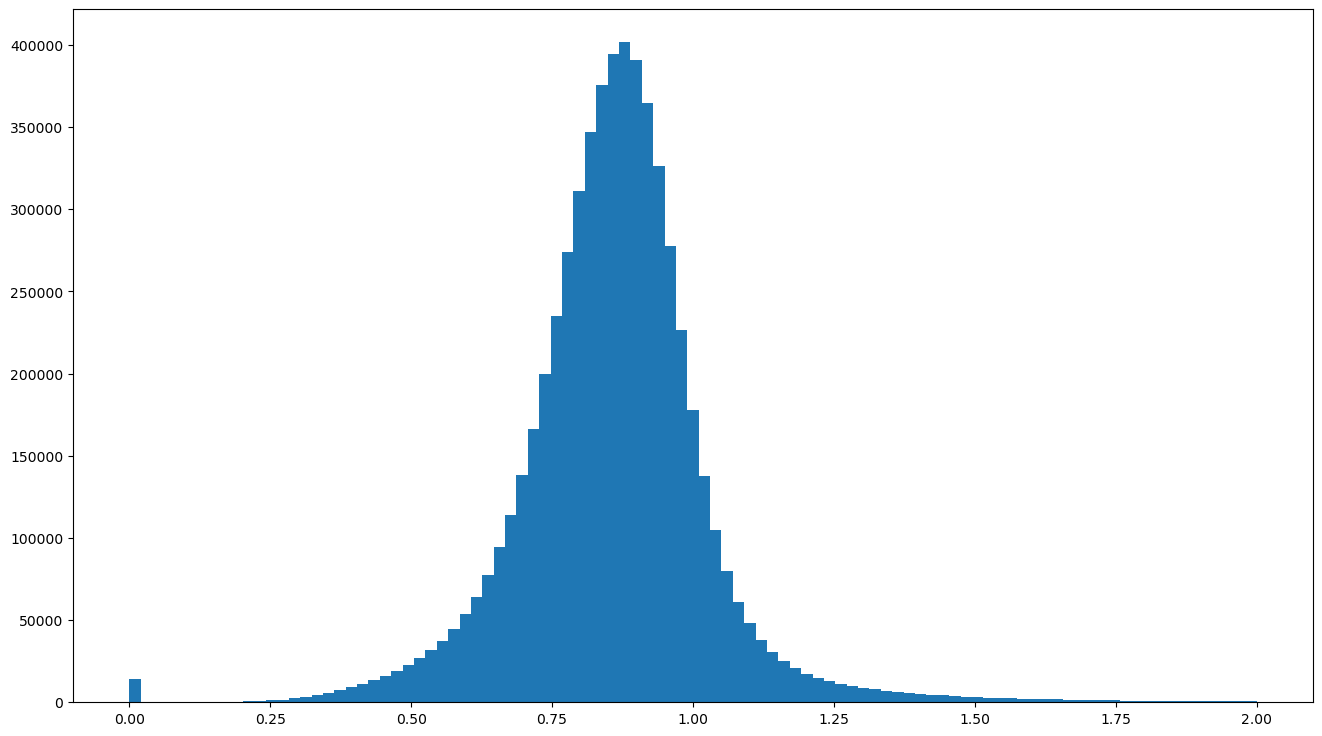

In [74]:
plt.figure(figsize=(16, 9))
_ = plt.hist(proj_lens[actual_lens > 0] / actual_lens[actual_lens > 0], bins = np.linspace(0, 2, 100))

In [14]:
with open('data/train.jsonl') as in_file:
    for line in in_file:
        d = json.loads(line)
        # line_data = [
        #     d['curve']['grid']['grid_name'], 
        #     *map(
        #         str, 
        #         chain(d['curve']['x'], d['curve']['y'], d['curve']['t'])
        #     )
        # ]
        # out_file.write(' '.join(line_data) + '\n')
        curve_len = len()

# Track lengths

In [6]:
train_lens = []
with open(train_path) as f:
    for i in tqdm(f, total=6000000):
        d = json.loads(i)
        train_lens.append(len(d['curve']['x']))

  0%|          | 0/6000000 [00:00<?, ?it/s]

In [7]:
sum(train_lens)

285892335

(array([2.298433e+06, 2.144968e+06, 1.083809e+06, 3.196630e+05,
        1.026950e+05, 3.043800e+04, 1.185400e+04, 4.941000e+03,
        2.365000e+03, 8.340000e+02]),
 array([  4. ,  33.5,  63. ,  92.5, 122. , 151.5, 181. , 210.5, 240. ,
        269.5, 299. ]),
 <BarContainer object of 10 artists>)

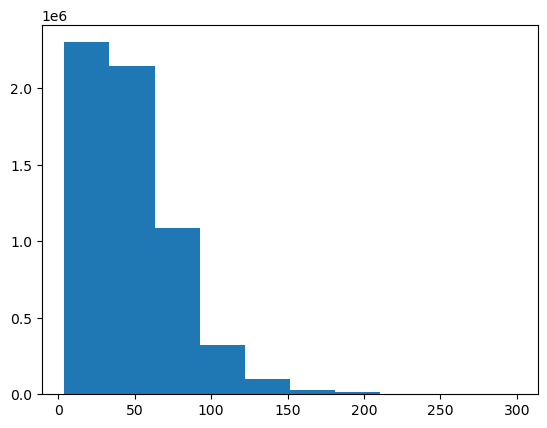

In [9]:
plt.hist(train_lens)

In [10]:
xs, ys = [], []
with open(train_path) as f:
    for i in tqdm(f, total=6000000):
        d = json.loads(i)
        xs.append(np.int32(d['curve']['x']))
        ys.append(np.int32(d['curve']['y']))

xs = np.concatenate(xs)
ys = np.concatenate(ys)

  0%|          | 0/6000000 [00:00<?, ?it/s]

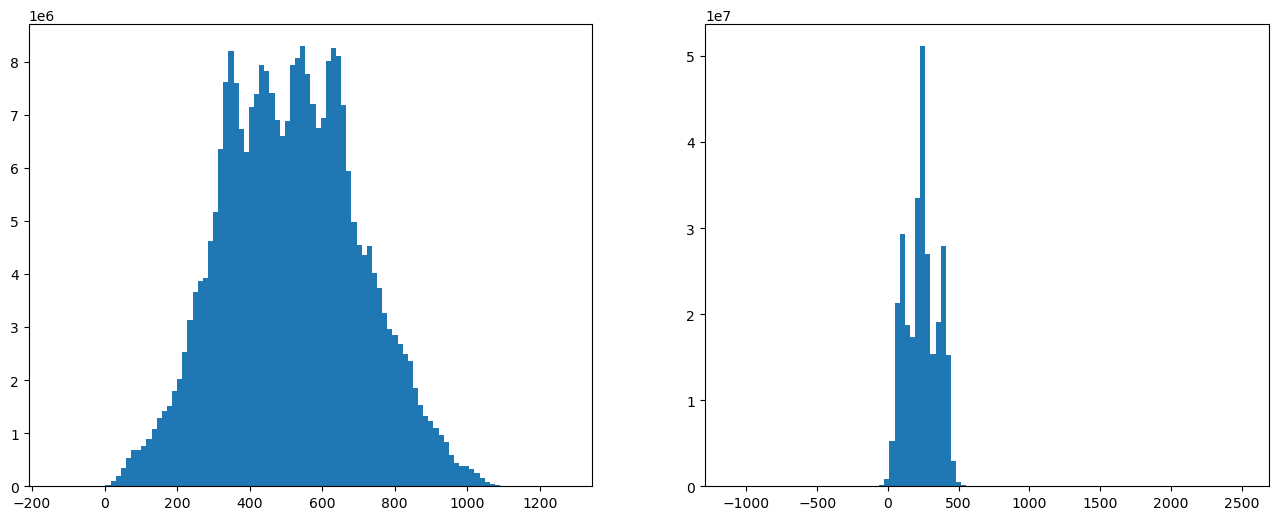

In [16]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
_ = plt.hist(xs, bins=100)
plt.subplot(1, 2, 2)
_ = plt.hist(ys, bins=100)

# Step diffs

In [7]:
x_diffs, y_diffs, t_diffs = [], [], []
with open(train_path) as f:
    for i in tqdm(f, total=6000000):
        d = json.loads(i)
        xs = np.int16(d['curve']['x'])
        ys = np.int16(d['curve']['y'])
        ts = np.int16(d['curve']['t'])
        x_diffs.append(xs[1:] - xs[:-1])
        y_diffs.append(ys[1:] - ys[:-1])
        t_diffs.append(ts[1:] - ts[:-1])

x_diffs = np.concatenate(x_diffs)
y_diffs = np.concatenate(y_diffs)
t_diffs = np.concatenate(t_diffs)

  0%|          | 0/6000000 [00:00<?, ?it/s]

In [15]:
x_min, x_max, y_min, y_max, t_min, t_max = float('inf'), float('-inf'), float('inf'), float('-inf'), float('inf'), float('-inf')
with open(train_path) as f:
    for i in tqdm(f, total=6000000):
        d = json.loads(i)
        x_min = min(x_min, min(d['curve']['x']))
        y_min = min(y_min, min(d['curve']['y']))
        t_min = min(t_min, min(d['curve']['t']))
        x_max = max(x_max, max(d['curve']['x']))
        y_max = max(y_max, max(d['curve']['y']))
        t_max = max(t_max, max(d['curve']['t']))

x_min, x_max, y_min, y_max, t_min, t_max

  0%|          | 0/6000000 [00:00<?, ?it/s]

(-139, 1274, -1112, 2510, -1165, 10422)

In [9]:
wtf

0

In [12]:
x_diffs.max(), x_diffs.min()

(1077, -1047)

In [13]:
y_diffs.max(), y_diffs.min()

(2295, -2299)

In [14]:
t_diffs.max(), t_diffs.taskmin()

(9325, -2530)